In [1]:
import numpy as np

import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

from pathlib import Path
import time

In [2]:
def subsample(percent_on, audio):

    time_on = percent_on*audio.shape[0]

    sub_audio = audio[:np.ceil(time_on).astype('int32')]

    return np.arange(time_on), sub_audio.astype('int16')

In [3]:
filepath = f"{Path.home()}/Downloads"

filename = "20210910_030000.WAV"

## Read audio .WAV file
fs, audio = wav.read(Path(f"{filepath}/{filename}"))
audio = audio[:600*fs]

s1, audio1 = subsample(1.0, audio)
s2, audio2 = subsample(0.75, audio)
s3, audio3 = subsample(0.5, audio)
s4, audio4 = subsample(0.25, audio)

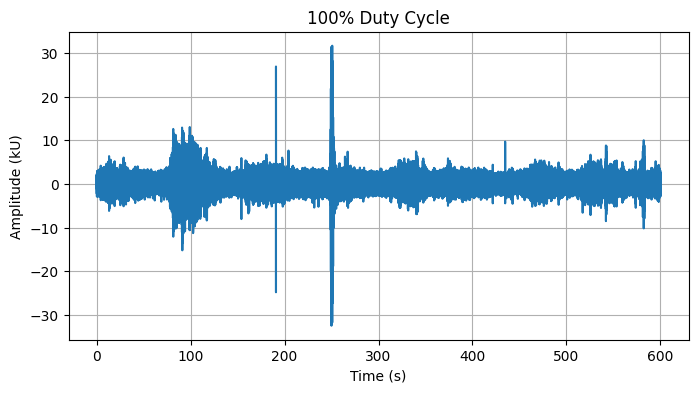

In [4]:
plt.figure(figsize=(8, 4))
plt.title("100% Duty Cycle")
plt.plot(s1/fs, audio1/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

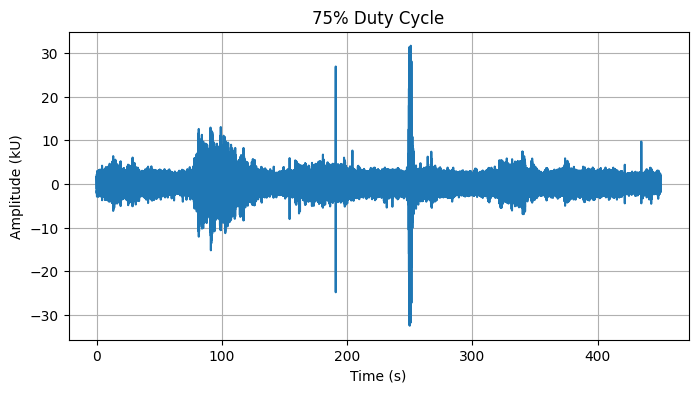

In [5]:
plt.figure(figsize=(8, 4))
plt.title("75% Duty Cycle")
plt.plot(s2/fs, audio2/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

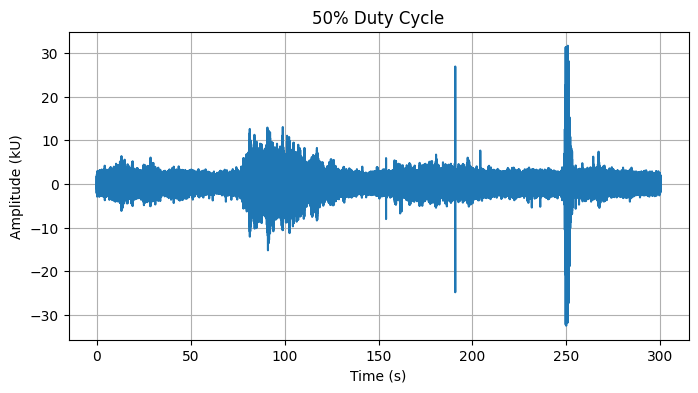

In [6]:
plt.figure(figsize=(8, 4))
plt.title("50% Duty Cycle")
plt.plot(s3/fs, audio3/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

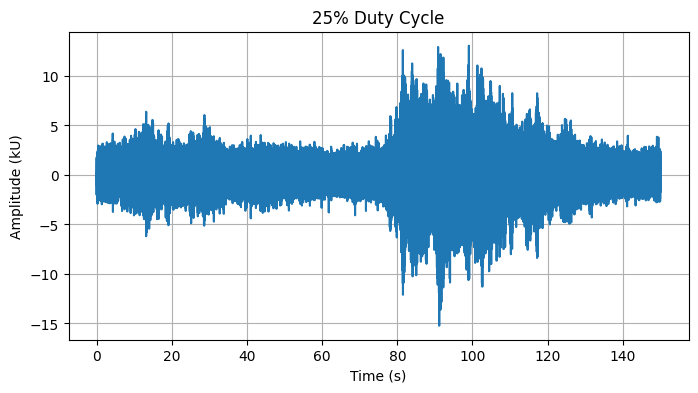

In [7]:
plt.figure(figsize=(8, 4))
plt.title("25% Duty Cycle")
plt.plot(s4/fs, audio4/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

In [8]:
filepath = f"{Path.home()}/Downloads"

filename = "20210910_030000.WAV"

## Read audio .WAV file
fs, audio = wav.read(Path(f"{filepath}/{filename}"))

In [9]:
options = np.linspace(0, 1.0, 201)
print(options)

psignal = np.zeros(201)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [10]:
start = time.time()
for i, p in enumerate(options):
    power = np.sum(subsample(p, audio)[1])**2 / (2*audio.shape[0] + 1)
    psignal[i] = power
print(f"Time to compute: {round(time.time() - start, 2)}s")

Time to compute: 89.48s


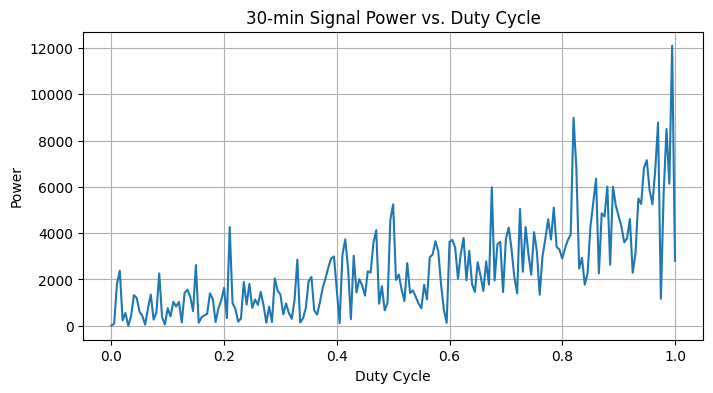

In [11]:
plt.figure(figsize=(8, 4))
plt.title("30-min Signal Power vs. Duty Cycle")
plt.plot(options, psignal)
plt.ylabel("Power")
plt.xlabel("Duty Cycle")
plt.grid(which="both")
plt.show()